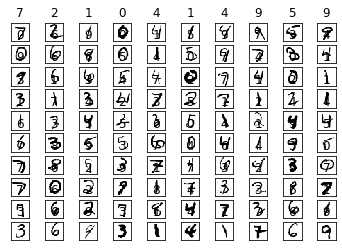

In [4]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

# 
# plot first 100 images out of 10,000 with their labels
# 
f1 = plt.figure(1)

for i in range(100):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 10, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

* ###  Plot the average image


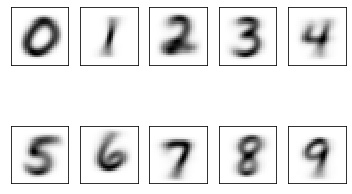

In [2]:
total_image  = np.empty((size_row * size_col, 10), dtype=float)
total_label  = np.zeros(10, dtype=int)

for i in range(10000):
    index = list_label[i]
    total_label[index] = total_label[index] + 1
    total_image[:, index] += list_image[:, i]
    
for i in range(10):
    cnt = total_label[i]
    line = total_image[:,i]
    total_image[:, i] = line/cnt
    

for i in range(10):
    t_vector   = total_image[:, i]
    t_matrix   = t_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.imshow(t_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

* ### Present the output of the neural network with random weights

In [5]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
 
result = np.zeros(10)
noise = np.random.randn(784, 10)
tmp = []

for i in range(10000):
    line = []
    line = np.dot(list_image[:,i], noise)
    tmp.append(line)

tmp = np.array(tmp).T
result = softmax(tmp/255)


tmp2 = np.sum(result, axis=1)
real = tmp2/10000
tmp3 = []
tmp3 = real
print(tmp3)

[2.25529828e-10 9.63153577e-06 1.82450358e-13 2.86034446e-09
 8.47072023e-13 9.03646964e-05 5.15318530e-11 2.41122475e-13
 3.07088978e-16 6.29148667e-10]
